<a href="https://colab.research.google.com/github/priyansh2003/GAN-Architecture/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies to build our GAN!

In [14]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
#Limiting memory growth in the GPU

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , TRUE)

In [16]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [17]:
ds = tfds.load('fashion_mnist', split = 'train')

In [18]:
ds.as_numpy_iterator().next()['label']

2

Visualizing data!

In [19]:
import numpy as np

In [20]:
iterator = ds.as_numpy_iterator()

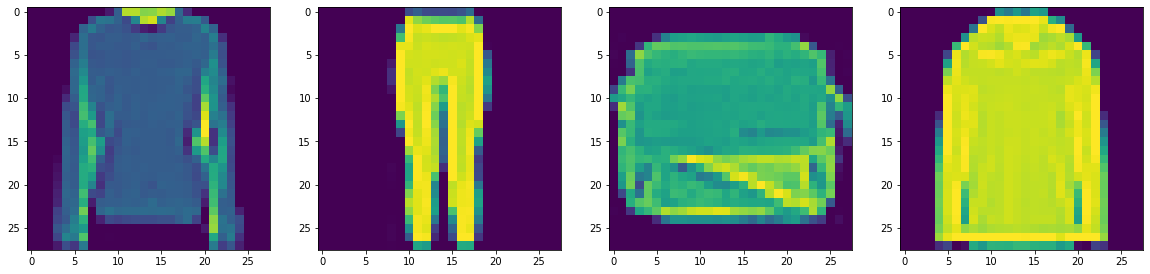

In [21]:
fig , ax = plt.subplots(ncols = 4 , figsize = (20,20))

for idx in range(4):
  #Grabbing our images and the respective labels
   sample = iterator.next()
   #Plotting images!
   ax[idx].imshow(np.squeeze(sample['image']))


In [22]:
#Scaling the images between 0 and 1.

def scale_images(data):
    image = data['image']
    return image/255

In [23]:
#Reloading our fashion dataset
ds = tfds.load('fashion_mnist', split = 'train')

#Running the datasetvia our scaling function to scale down the dtaa for faster processing
ds = ds.map(scale_images)

#Cache the dataset
ds= ds.cache()

#Shuffling the dataset
ds = ds.shuffle(60000)

#Batching the images in sizes of 128
ds= ds.batch(128)

#Preventing bottlenecking
ds = ds.prefetch(64)

In [24]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

Building The Neural Network Architecture!

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,Dense , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D

In [34]:
def build_generator():
  model = Sequential()

  model.add(Dense(7*7*128 , input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  return model

In [35]:
test_model = build_generator()

In [36]:
test_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
Total params: 809,088
Trainable params: 809,088
Non-trainable params: 0
_________________________________________________________________
